# Exercises to demonstrate understanding of Bayesian Statistics
from tutorials by Allen Downey


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The cookie problem

> Suppose you have two bowls of cookies.  Bowl 1 contains 30 vanilla and 10 chocolate cookies.  Bowl 2 contains 20 vanilla of each.
>
> You choose one of the bowls at random and, without looking into the bowl, choose one of the cookies at random.  It turns out to be a vanilla cookie.
>
> What is the chance that you chose Bowl 1?

Assume that there was an equal chance of choosing either bowl and an equal chance of choosing any cookie in the bowl.
 

### Solution
From Bayes Theorem, we have
$$p(H|D) = \dfrac{p(D|H)p(H)}{p(D)}$$

$H$ - hypothesis that cookie came from Bowl 1

$D$ - cookie is vanilla




$p(H)$- probability of the hypothesis **before** you see the data (also known as prior).
Now, for all that we know, when we initially assign a probability to the jars we choose, we have them to be equally likely, i.e, 0.5 chance that the either one of the bowl is chosen. Subsequently, the prior probabilities become 1/2 and 1/2

In [20]:
hypos = 'Bowl 1', 'Bowl 2'
probs = 1/2, 1/2
prior = pd.Series(probs, hypos)
prior

Bowl 1    0.5
Bowl 2    0.5
dtype: float64

$p(D|H)$ - this is conditional likelihood, i.e for the particular hypothesis $H$(the cookie is from Bowl 1), what is the probability that it is a vanilla cookie? Another hypothesis could be that the cookie came from Bowl 2, and we can also calculate the likelihood of that cookie being vanilla.

In [21]:
likelihood = 30/40, 20/40
likelihood

(0.75, 0.5)

The next step is to multiply the prior with its likelihood. What this product yields is the probability of each of the hypotheses being true, given the prior holds. 

In [22]:
unnorm = prior * likelihood
unnorm

Bowl 1    0.375
Bowl 2    0.250
dtype: float64

Now an interesting thing to note is that, when the prior gets multiplied by the likelihood, the sum of the resulting probabilities, do not add upto one. This is because each of the given hypothesis has its own probability of occurence for the data. So what we do is the process of normalization. 

Now normalization consists of summing up these two probabilites and dividing each of them by this sum. 
$p(D)$ -  is the sum that we've been refering to and this is the total probability.
expanding $p(D)$ in accordance with the law of total probability, we have

$p(D) = p(D)* p(D|H) + p(D)* p(D|H')$
(this is for the case which we have two hypotheses)


In [23]:
prob_data = unnorm.sum()
prob_data

0.625

Now we divide the unnormalized probabilities with its sum and to obtain the posterior.

The resultants are two fractions that will add up to one for the two hypotheses.

The resultant probability is called the posterior and $p(H|D)$- probability of the hypothesis **after** you see the data(also known as the posterior)

In [24]:
posterior = unnorm / prob_data
posterior

Bowl 1    0.6
Bowl 2    0.4
dtype: float64

The next thing that we do is put the cookie back, (to make the likelihoods remain the same) and draw a cookie from the same bowl. The drawn cookie appears to a chocolate one. Now what would be the probability that this cookie too was from the first bowl itself?

Now on taking the priors for the second update. The prior in this situation is the outcome of the experiment that we have done earlier, i.e. probability that the first bowl was picked. So the posterior of the first iteration is the prior of the second. 

This is a very important aspect of Bayesian inference. The beliefs that we have are updated with each new experience in the world. In Bayesian inference, after updating the prior to the posterior, we can take more data and update again! For the second update, the posterior from the first data becomes the prior for the second data.

In [25]:
prior2 = posterior
prior2

Bowl 1    0.6
Bowl 2    0.4
dtype: float64

The next thing we that we need to do is to calculate the likelihood of the data given the hypotheses. Here the data $D$ is the cookie being vanilla.


In [26]:
likelihood2 = 10/40, 20/40

The next steps are as follows. We multiply the priors with the likelihoods and then normalize them to obtain the probability of choosing the second cookie from the Bowl 1.

In [27]:
unnorm2 = prior2*likelihood2
unnorm2

Bowl 1    0.15
Bowl 2    0.20
dtype: float64

In [28]:
prob_data2 = unnorm2.sum()
prob_data2

0.35

In [29]:
posterior2 = unnorm2 / prob_data2
posterior2

Bowl 1    0.428571
Bowl 2    0.571429
dtype: float64

Now let us change a bit about the condition of replacement. Suppose the cookie taken from the first iteration is not replaced. The prior of the second update is still the same, but the likelihood changes. For simplicity lets take Bowl 1 with 4 vanilla cookies and 2 chocolate and Bowl 2 has 2 of them each. Lets conduct the experiment once again.

In [30]:
c_hypos = 'B1', 'B2'
c_probs = 1/2, 1/2
c_prior = pd.Series(c_probs, c_hypos)
c_prior

B1    0.5
B2    0.5
dtype: float64

In [44]:
#likelihood of vanilla cookies for the two bowls
c_ll = 4/6, 2/4

In [45]:
c_unnorm = c_prior*c_ll
c_unnorm

B1    0.333333
B2    0.250000
dtype: float64

In [46]:
c_prob_data1 = c_unnorm.sum()
c_prob_data1

0.5833333333333333

In [47]:
c_posterior= c_unnorm/c_prob_data1
c_posterior

B1    0.571429
B2    0.428571
dtype: float64

Now the chosen cookie cookie isn't replaced. What is the probability of choosing a chocolate cookie from the same bowl?

In [48]:
#the prior will be the same as the posterior of the first
c_prior2 = c_posterior
c_prior2

B1    0.571429
B2    0.428571
dtype: float64

In [53]:
"""the vanilla cookie from the first jar isn't replaced. 
Therefore, there will be 3 vanilla and 2 chocolate cookies left in bowl1 and the same as before for bowl2."""
c_ll2 = 2/5, 2/4

In [54]:
c_unnorm2 = c_prior2*c_ll2
c_unnorm2

B1    0.228571
B2    0.214286
dtype: float64

In [55]:
c_prob_data2 = c_unnorm2.sum()
c_prob_data2

0.44285714285714295

In [56]:
c_posterior2= c_unnorm2/c_prob_data2
c_posterior2

B1    0.516129
B2    0.483871
dtype: float64

Let us take it up a notch and use distributions to visualize this

### 101 Bowls

Suppose instead of 2 bowls there are 101 bowls:

* Bowl 0 contains no vanilla cookies,

* Bowl 1 contains 1% vanilla cookies,

* Bowl 2 contains 2% vanilla cookies,

and so on, up to

* Bowl 99 contains 99% vanilla cookies, and

* Bowl 100 contains all vanilla cookies.

As in the previous problem, there are only two kinds of cookies, vanilla and chocolate.  So Bowl 0 is all chocolate cookies, Bowl 1 is 99% chocolate, and so on.

Suppose we choose a bowl at random, choose a cookie at random, and it turns out to be vanilla.  What is the probability that the cookie came from Bowl $x$, for each value of $x$?

To represent the prior, I'll use a Pandas `Series` with 101 equally spaced quantities from 0 to 1.

In [66]:
xs = np.linspace(0, 1, num=101)
prob = 1/101

prior = pd.Series(prob, xs)
prior.head()

0.00    0.009901
0.01    0.009901
0.02    0.009901
0.03    0.009901
0.04    0.009901
dtype: float64

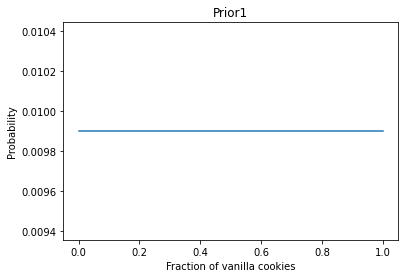

In [67]:
prior.plot()

plt.xlabel('Fraction of vanilla cookies')
plt.ylabel('Probability')
plt.title('Prior1');

Now that we have a prior, we need to compute likelihoods.

In [68]:
likelihood_vanilla = xs
likelihood_chocolate = 1 - xs
unnorm = prior * likelihood_vanilla
posterior = unnorm / unnorm.sum()

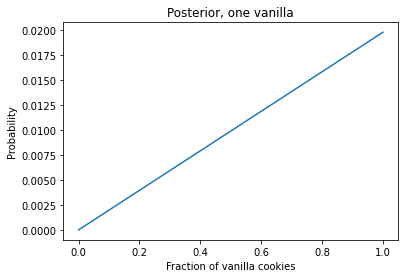

In [69]:
posterior.plot()

plt.xlabel('Fraction of vanilla cookies')
plt.ylabel('Probability')
plt.title('Posterior, one vanilla');

Suppose we put the first cookie back, stir the bowl, draw from the same bowl again, and get a vanilla cookie again.

What's are the posterior probabilities now?

We can do another update, using the posterior from the first draw as the prior for the second draw.

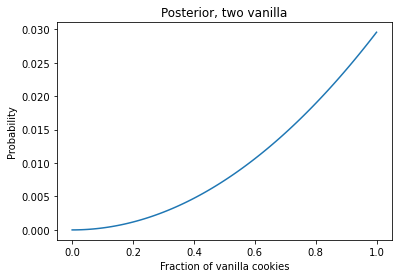

In [70]:
prior2 = posterior
unnorm2 = prior2 * likelihood_vanilla
posterior2 = unnorm2 / unnorm2.sum()
posterior2.plot()

plt.xlabel('Fraction of vanilla cookies')
plt.ylabel('Probability')
plt.title('Posterior, two vanilla');

## Dice Problem
I have a box with,
4 sided
6 sided 
8 sided and 
12 sided die.
Suppose a random die is selected and I get a 6 six. What is the probability that I rolled each die?


In [229]:
class Distribution(pd.Series):
    def __init__(self, *args, **kwargs):
        """Initialize a Pmf.
        Note: this cleans up a weird Series behavior, which is
        that Series() and Series([]) yield different results.
        See: https://github.com/pandas-dev/pandas/issues/16737
        """
        if args or ('index' in kwargs):
            super().__init__(*args, **kwargs)
        else:
            
            super().__init__([], **kwargs)

    @property
    def qs(self):
        """Get the quantities.
        :return: NumPy array
        """
        return self.index.values

    @property
    def ps(self):
        """Get the probabilities.
        :return: NumPy array
        """
        return self.values

    def head(self, n=3):
        """Override Series.head to return a Distribution.
        n: number of rows
        returns: Distribution
        """
        s = super().head(n)
        return self.__class__(s)

    def tail(self, n=3):
        """Override Series.tail to return a Distribution.
        n: number of rows
        returns: Distribution
        """
        s = super().tail(n)
        return self.__class__(s)

    def transform(self, *args, **kwargs):
        """Override to transform the quantities, not the probabilities."""
        qs = self.index.to_series().transform(*args, **kwargs)
        return self.__class__(self.ps, qs, copy=True)

    def _repr_html_(self):
        """Returns an HTML representation of the series.
        Mostly used for Jupyter notebooks.
        """
        df = pd.DataFrame(dict(probs=self))
        return df._repr_html_()

    def __call__(self, qs):
        """Look up quantities.
        qs: quantity or sequence of quantities
        returns: value or array of values
        """
        string_types = (str, bytes, bytearray)

        # if qs is a sequence type, use reindex;
        # otherwise use get
        if hasattr(qs, '__iter__') and not isinstance(qs, string_types):
            s = self.reindex(qs, fill_value=0)
            return s.to_numpy()
        else:
            return self.get(qs, default=0)

    def mean(self):
        """Expected value.
        :return: float
        """
        return self.make_pmf().mean()

    def mode(self, **kwargs):
        """Most common value.
        If multiple quantities have the maximum probability,
        the first maximal quantity is returned.
        :return: float
        """
        return self.make_pmf().mode(**kwargs)

    def var(self):
        """Variance.
        :return: float
        """
        return self.make_pmf().var()

    def std(self):
        """Standard deviation.
        :return: float
        """
        return self.make_pmf().std()

    def median(self):
        """Median (50th percentile).
        There are several definitions of median;
        the one implemented here is just the 50th percentile.
        :return: float
        """
        return self.make_cdf().median()

    def quantile(self, ps, **kwargs):
        """Quantiles.
        Computes the inverse CDF of ps, that is,
        the values that correspond to the given probabilities.
        :return: float
        """
        return self.make_cdf().quantile(ps, **kwargs)

    def credible_interval(self, p):
        """Credible interval containing the given probability.
        p: float 0-1
        :return: array of two quantities
        """
        tail = (1 - p) / 2
        ps = [tail, 1 - tail]
        return self.quantile(ps)

    def choice(self, *args, **kwargs):
        """Makes a random sample.
        Uses the probabilities as weights unless `p` is provided.
        args: same as np.random.choice
        options: same as np.random.choice
        :return: NumPy array
        """
        pmf = self.make_pmf()
        return pmf.choice(*args, **kwargs)

    def sample(self, *args, **kwargs):
        """Samples with replacement using probabilities as weights.
        n: number of values
        :return: NumPy array
        """
        cdf = self.make_cdf()
        return cdf.sample(*args, **kwargs)

    def add_dist(self, x):
        """Distribution of the sum of values drawn from self and x.
        x: Distribution, scalar, or sequence
        :return: new Distribution, same subtype as self
        """
        pmf = self.make_pmf()
        res = pmf.add_dist(x)
        return self.make_same(res)

    def sub_dist(self, x):
        """Distribution of the diff of values drawn from self and x.
        x: Distribution, scalar, or sequence
        :return: new Distribution, same subtype as self
        """
        pmf = self.make_pmf()
        res = pmf.sub_dist(x)
        return self.make_same(res)

    def mul_dist(self, x):
        """Distribution of the product of values drawn from self and x.
        x: Distribution, scalar, or sequence
        :return: new Distribution, same subtype as self
        """
        pmf = self.make_pmf()
        res = pmf.mul_dist(x)
        return self.make_same(res)

    def div_dist(self, x):
        """Distribution of the ratio of values drawn from self and x.
        x: Distribution, scalar, or sequence
        :return: new Distribution, same subtype as self
        """
        pmf = self.make_pmf()
        res = pmf.div_dist(x)
        return self.make_same(res)

    def pmf_outer(dist1, dist2, ufunc):
        """Computes the outer product of two PMFs.
        dist1: Distribution object
        dist2: Distribution object
        ufunc: function to apply to the qs
        :return: NumPy array
        """
        #TODO: convert other types to Pmf
        pmf1 = dist1
        pmf2 = dist2

        qs = ufunc.outer(pmf1.qs, pmf2.qs)
        ps = np.multiply.outer(pmf1.ps, pmf2.ps)
        return qs * ps

    def gt_dist(self, x):
        """Probability that a value from self is greater than a value from x.
        x: Distribution, scalar, or sequence
        :return: float probability
        """
        pmf = self.make_pmf()
        return pmf.gt_dist(x)

    def lt_dist(self, x):
        """Probability that a value from self is less than a value from x.
        x: Distribution, scalar, or sequence
        :return: float probability
        """
        pmf = self.make_pmf()
        return pmf.lt_dist(x)

    def ge_dist(self, x):
        """Probability that a value from self is >= than a value from x.
        x: Distribution, scalar, or sequence
        :return: float probability
        """
        pmf = self.make_pmf()
        return pmf.ge_dist(x)

    def le_dist(self, x):
        """Probability that a value from self is <= than a value from x.
        x: Distribution, scalar, or sequence
        :return: float probability
        """
        pmf = self.make_pmf()
        return pmf.le_dist(x)

    def eq_dist(self, x):
        """Probability that a value from self equals a value from x.
        x: Distribution, scalar, or sequence
        :return: float probability
        """
        pmf = self.make_pmf()
        return pmf.eq_dist(x)

    def ne_dist(self, x):
        """Probability that a value from self is <= than a value from x.
        x: Distribution, scalar, or sequence
        :return: float probability
        """
        pmf = self.make_pmf()
        return pmf.ne_dist(x)

    def max_dist(self, n):
        """Distribution of the maximum of `n` values from this distribution.
        n: integer
        :return: Distribution, same type as self
        """
        cdf = self.make_cdf().max_dist(n)
        return self.make_same(cdf)

    def min_dist(self, n):
        """Distribution of the minimum of `n` values from this distribution.
        n: integer
        :return: Distribution, same type as self
        """
        cdf = self.make_cdf().min_dist(n)
        return self.make_same(cdf)

    prob_gt = gt_dist
    prob_lt = lt_dist
    prob_ge = ge_dist
    prob_le = le_dist
    prob_eq = eq_dist
    prob_ne = ne_dist
    
class Pmf(Distribution):
    """Represents a probability Mass Function (PMF)."""
    
    def normalize(self):
        """Make the probabilities add up to 1 (modifies self).
        :return: normalizing constant
        """
        total = self.sum()
        self /= total
        return total
    
    def update(self, likelihood, data):
        """Bayesian update.
        likelihood: function that takes (data, hypo) and returns
                    likelihood of data under hypo, P(data|hypo)
        data: in whatever format likelihood understands
        :return: normalizing constant
        """
        for hypo in self.qs:
            self[hypo] *= likelihood(data, hypo)

        return self.normalize()
    
    def sort(self, ascending=True, na_position='last'):
        """Sort the quantities in place.
        ascending: boolean, ascending order, default True
        na_position: where to put NaN, default last
        """
        self.sort_index(ascending=ascending,
                        inplace=True,
                        na_position=na_position)
    
    @staticmethod
    def from_seq(seq, normalize=True, sort=True, ascending=True,
                 dropna=True, na_position='last', **options):
        """Make a PMF from a sequence of values.
        seq: any kind of sequence
        normalize: whether to normalize the Pmf, default True
        sort: whether to sort the Pmf by values, default True
        ascending: whether to sort in ascending order, default True
        dropna: whether to drop NaN values, default True
        na_position: If ‘first’ puts NaNs at the beginning,
                        ‘last’ puts NaNs at the end.
        options: passed to the pd.Series constructor
        :return: Pmf object
        """
        # compute the value counts
        series = pd.Series(seq).value_counts(normalize=normalize,
                                             sort=False,
                                             dropna=dropna)
        # make the result a Pmf
        # (since we just made a fresh Series, there is no reason to copy it)
        options['copy'] = False
        pmf = Pmf(series, **options)

        # sort in place, if desired
        if sort:
            pmf.sort(ascending=ascending, na_position=na_position)

        """In the current implementation, `from_seq` sorts numerical
           quantities whether you want to or not.  If keeping
           the order of the elements is important, let me know and
           I'll rethink the implementation
        """

        return pmf
    

### The dice problem

Create a suite of hypotheses that represents dice with different numbers of sides.

In [126]:
dice = Pmf.from_seq([4, 6, 8, 12])
dice

,probs
4,0.25
6,0.25
8,0.25
12,0.25


One way to solve this problem is the same as the previous method, by using manual calculation. Since a 6 is drawn, the likelihood for the first die would be zero whereas for the others it will 1/no.of their corresponding sides.


In [120]:
dice[4] *= 0
dice[6] *= 1/6
dice[8] *= 1/8
dice[12] *= 1/12

dice.normalize()
dice

,probs
4,0.000000
6,0.876197
8,0.116958
12,0.006845


Another way would be to utilize the functions present in the class and the likelihood functions that takes in the data and hypotheses and returns the probability of data(the outcome of rolling the die) given the hypothesis(number of sides on the die).

In [127]:
def likelihood_dice(data, hypo):
    """Likelihood function for the dice problem.
    
    data: outcome of the die roll
    hypo: number of sides
    
    returns: float probability
    """
    
    observed_outcome = data
    number_of_sides = hypo
    
    if observed_outcome > number_of_sides:
        return 0  #this takes of the situations where the outcome is greater than the number of faces of the die
    else:
        return 1 / number_of_sides

In [128]:
dice = Pmf.from_seq([4, 6, 8, 12])
dice.update(likelihood_dice, 6)
dice

,probs
4,0.000000
6,0.444444
8,0.333333
12,0.222222


For any given sequence of numbers, the probability that a particular die was chosen can be shown

In [123]:
for roll in [8, 7, 7, 5, 4]:
    dice.update(likelihood_dice, roll)

In [124]:
dice

,probs
4,0.000000
6,0.000000
8,0.919294
12,0.080706


### Euro problem
*"When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. 'It looks very suspicious to me,' said Barry Blight, a statistics lecturer at the London School of Economics. 'If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.' "*

From “The Guardian” quoted by MacKay, Information Theory, Inference, and Learning Algorithms.

Exercise 1: Write a function called likelihood_euro that defines the likelihood function for the Euro problem. Note that hypo is in the range 0 to 100.

Here's an outline to get you started.

In [132]:
def decorate_euro(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Probability of heads')
    plt.ylabel('PMF')
    plt.title(title)

In [193]:
def likelihood_euro(data, hypo):
    """ Likelihood function for the Euro problem.
    
    data: string, either 'H' or 'T'
    hypo: prob of heads (0-100)
    
    returns: float probability
    """
    x = hypo / 100
    if data == 'H':
        return x
    else:
        return 1-x

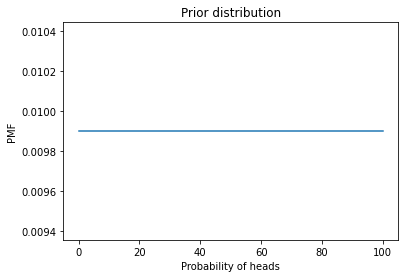

In [218]:
euro = Pmf.from_seq(range(101))
euro.plot()
decorate_euro('Prior distribution')

We spin the coin and find out that heads appear on the first toss

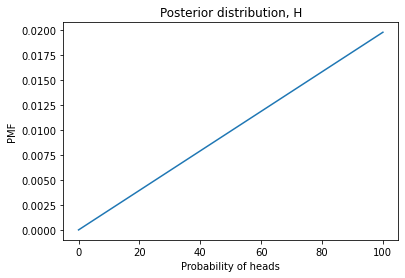

In [219]:
euro.update(likelihood_euro, 'H')
euro.plot()
decorate_euro('Posterior distribution, H')

In the second spin too, the coin lands on heads

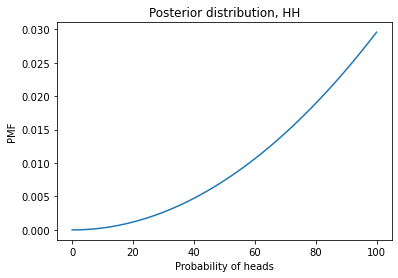

In [220]:
euro.update(likelihood_euro, 'H')
euro.plot()
decorate_euro('Posterior distribution, HH')

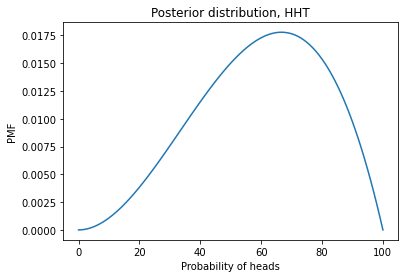

In [221]:
euro.update(likelihood_euro, 'T')
euro.plot()
decorate_euro('Posterior distribution, HHT')

In [225]:
print(euro[4])

0.00018433843384338435


Here are the posterior probabilities after 140 heads and 110 tails.

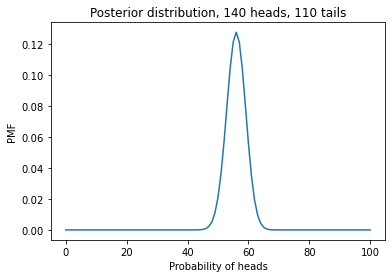

In [226]:
euro = Pmf.from_seq(range(101))

evidence = 'H' * 140 + 'T' * 110
for outcome in evidence:
    euro.update(likelihood_euro, outcome)
    
euro.plot()

decorate_euro('Posterior distribution, 140 heads, 110 tails')

Lets take a different prior and do the same updates

In [227]:
def TrianglePrior():
    """Makes a Suite with a triangular prior.
    """
    suite = Pmf(name='triangle')
    for x in range(0, 51):
        suite[x] = x
    for x in range(51, 101):
        suite[x] = 100-x 
    suite.normalize()
    return suite

<ipython-input-229-33ce8bd7b832>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__([], **kwargs)


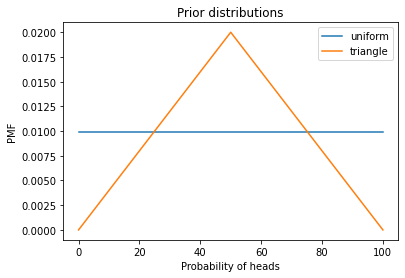

In [230]:
euro1 = Pmf.from_seq(range(101), name='uniform')
euro1.plot()

euro2 = TrianglePrior()
euro2.plot()

plt.legend()
decorate_euro('Prior distributions')

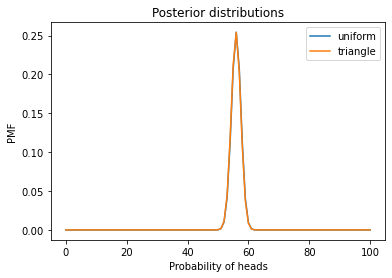

In [234]:
# Solution

evidence = 'H' * 140 + 'T' * 110
for outcome in evidence:
    euro1.update(likelihood_euro, outcome)
    euro2.update(likelihood_euro, outcome)

euro1.plot()
euro2.plot()

decorate_euro('Posterior distributions')
plt.legend()

